## Prepare Data

In [1]:
# Import our dependencies
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
#read the csv
ML_Data= pd.read_csv('Data/Five_Year_Data.csv')
ML_Data.head()

,GEO_ID,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Population (16+),Employed,...,Total Population,White,Black,American Indian,Asian,Pacific Islander,Hispanic/Latino,County,State,Year
0,0500000US01001,2.6,8.7,32.6,20.3,8.1,15.9,11.8,43368.0,24124.0,...,55200,76.9,19.1,0.3,1.0,0.1,2.8,Autauga County,Alabama,2018
1,0500000US01003,2.7,7.0,27.6,22.0,9.4,20.7,10.6,167712.0,93379.0,...,208107,86.3,9.5,0.7,0.8,0.0,4.5,Baldwin County,Alabama,2018
2,0500000US01005,8.2,18.8,35.7,18.1,7.0,7.8,4.4,20948.0,8720.0,...,25782,47.4,47.6,0.3,0.4,0.0,4.3,Barbour County,Alabama,2018
3,0500000US01007,5.7,11.1,47.3,18.6,5.8,7.6,3.9,18470.0,8099.0,...,22527,76.7,22.3,0.0,0.2,0.0,2.4,Bibb County,Alabama,2018
4,0500000US01009,7.5,12.4,34.0,21.4,12.0,8.1,4.5,45915.0,21346.0,...,57645,95.5,1.5,0.2,0.3,0.0,9.1,Blount County,Alabama,2018


In [3]:
ML_Data.columns

Index(['GEO_ID', 'Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', 'Associate's_degree', 'Bachelor's_degree',
       'Graduate_degree', 'Population (16+)', 'Employed',
       'Median Household Income', 'Per capita Income', 'Unemployment Rate',
       'Professional (Occupation)', 'Service (Occupation)',
       'Sales (Occupation)', 'Construction (Occupation)',
       'Production (Occupation)', 'Salary (Class)', 'Gov't (Class)',
       'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       'Child-poverty', 'Median Home value', 'Median Mortgage', 'Median Rent',
       'Total Population', 'White', 'Black', 'American Indian', 'Asian',
       'Pacific Islander', 'Hispanic/Latino', 'County', 'State', 'Year'],
      dtype='object')

In [5]:
#Poverty Rate model data
#removed year, county, and state
#Previous data= ML_Data[['Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       # 'Some_College', "Associate's_degree", "Bachelor's_degree",
       # 'Graduate_degree', 'Population (16+)', 'Employed',
       # 'Median Household Income', 'Per capita Income', 'Unemployment Rate',
       # 'Professional (Occupation)', 'Service (Occupation)',
       # 'Sales (Occupation)', 'Construction (Occupation)',
       # 'Production (Occupation)', 'Salary (Class)', "Gov't (Class)",
       # 'Self-employed (Class)', 'Fam-unpaid (Class)', 'Poverty',
       # 'Child-poverty', 'Median Home value', 'Median Mortgage', 'Median Rent',
       # 'Total Population', 'White', 'Black', 'American Indian', 'Asian',
       # 'Pacific Islander', 'Hispanic/Latino']]

#Here we will test out only education level data to poverty rate
Poverty_data= ML_Data[['Below_9th_grade', '9_12th_grade', 'High_School_Grad',
       'Some_College', "Associate's_degree", "Bachelor's_degree",
       'Graduate_degree', 'Poverty']]
Poverty_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Poverty
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,15.4
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,10.6
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,28.9
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,14.0
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,14.4


## Data Exploration and Analysis

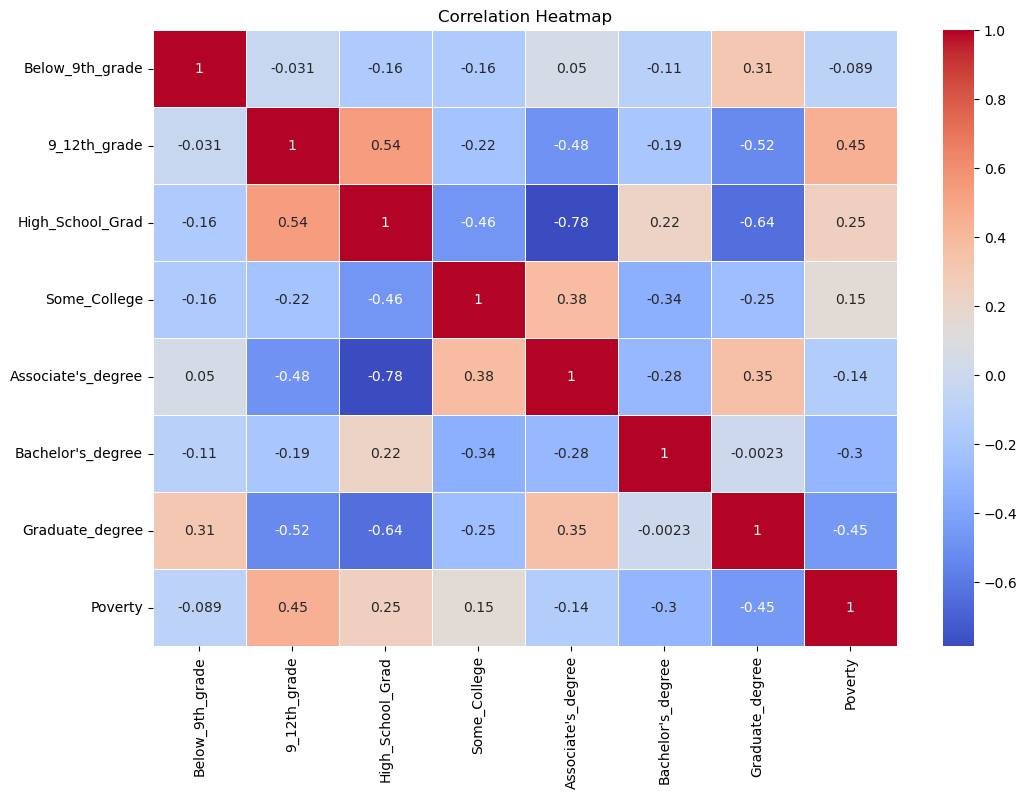

In [7]:
# Calculate the correlation matrix
#https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
#chatgpt for aid on plotting
correlation = Poverty_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# One Hot Encoder - Only run if there is categorical data

In [7]:
Unemployment_data.dtypes

NameError: name 'Unemployment_data' is not defined

In [36]:
# Generate our categorical variable lists. #checks for all cetegories that are objects
state_cat = Unemployment_data.dtypes[Unemployment_data.dtypes == "object"].index.tolist()

In [37]:
# Check the number of unique values in each column
Unemployment_data[state_cat].nunique()

Series([], dtype: float64)

In [38]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Unemployment_data[state_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(state_cat)
encode_df.head()

""
0
1
2
3
4


In [39]:
# Merge one-hot encoded features and drop the originals
Unemployment_data=Unemployment_data.merge(encode_df,left_index=True, right_index=True)
Unemployment_data= Unemployment_data.drop(state_cat, axis=1)
Unemployment_data.head()

,Below_9th_grade,9_12th_grade,High_School_Grad,Some_College,Associate's_degree,Bachelor's_degree,Graduate_degree,Unemployment Rate,Year
0,2.6,8.7,32.6,20.3,8.1,15.9,11.8,4.2,2018
1,2.7,7.0,27.6,22.0,9.4,20.7,10.6,4.4,2018
2,8.2,18.8,35.7,18.1,7.0,7.8,4.4,9.5,2018
3,5.7,11.1,47.3,18.6,5.8,7.6,3.9,7.5,2018
4,7.5,12.4,34.0,21.4,12.0,8.1,4.5,4.1,2018


# Random Forest Model

In [8]:
# Split target column and Features Columns
y = Poverty_data['Poverty']
X = Poverty_data.drop(columns='Poverty')

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create scaler instance
scaler = StandardScaler()
# Fit the Standardscaler with training data
scaler.fit(X_train)
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Fitting the Random Forest Model

In [11]:
# Create the random forest Regressor instance
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [12]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

- Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [17]:
# Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = rf_model.score(X, y, sample_weight=None)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The score is -3.1218208442910464.
The r2 is 0.5685593032942589.
The mean squared error is 16.735975835973424.
The root mean squared error is 4.090962702833335.
The standard deviation is 6.220438667941329.


/Users/gcarmona/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


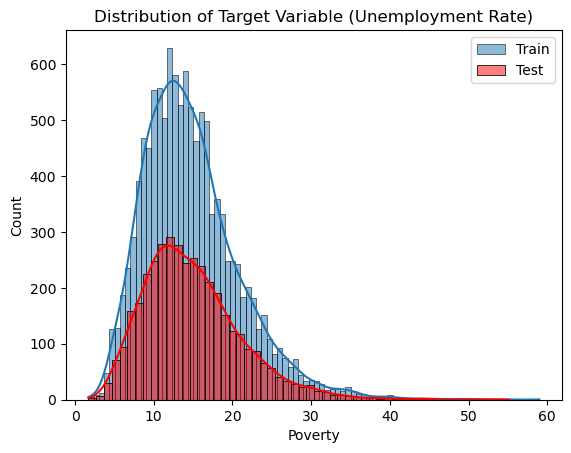

In [15]:
# Visualize the distribution of the target variable
sb.histplot(y_train, kde=True, label='Train')
sb.histplot(y_test, kde=True, label='Test', color='red')
plt.legend()
plt.title('Distribution of Target Variable (Unemployment Rate)')
plt.show()


In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.36248379416728255, 'High_School_Grad'),
 (0.16100379810996562, 'Below_9th_grade'),
 (0.12428271294215729, "Bachelor's_degree"),
 (0.11365933774187305, '9_12th_grade'),
 (0.08577048853062723, 'Graduate_degree'),
 (0.07804856392582879, "Associate's_degree"),
 (0.07475130458226538, 'Some_College')]